In [25]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [26]:
data = pd.read_csv('RAW_interactions.csv')

In [27]:
data.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [28]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [29]:
data.dropna(how = 'all', inplace = False)
data.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [30]:
x1 = data['review'] = data['review'].astype(str).apply(remove_punctuation)
data.head(10)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad Cooked on top of stove for ...
1,1293707,40893,2011-12-21,5,So simple so delicious Great for chilly fall e...
2,8937,44394,2002-12-01,4,This worked very well and is EASY I used not ...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,Made the cheddar bacon topping adding a sprink...
5,52282,120345,2005-05-21,4,very very sweet after i waited the 2 days i bo...
6,124416,120345,2011-08-06,0,Just an observation so I will not rate I foll...
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet I would star...
8,76535,134728,2005-09-02,4,Very good
9,273745,134728,2005-12-22,5,Better than the real


In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [31]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [32]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [33]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [34]:
data['review'] = data['review'].apply(stopwords)
data.head(10)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,great salad cooked top stove 15 minutesadded s...
1,1293707,40893,2011-12-21,5,simple delicious great chilly fall evening dou...
2,8937,44394,2002-12-01,4,worked well easy used quite whole package 10oz...
3,126440,85009,2010-02-27,5,made mexican topping took bunko everyone loved
4,57222,85009,2011-10-01,5,made cheddar bacon topping adding sprinkling b...
5,52282,120345,2005-05-21,4,sweet waited 2 days bought 2 pints raspberries...
6,124416,120345,2011-08-06,0,observation rate followed procedure strawberri...
7,2000192946,120345,2015-05-10,2,recipe overly sweet would start 13 14 cup suga...
8,76535,134728,2005-09-02,4,good
9,273745,134728,2005-12-22,5,better real


In [35]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['review'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()  

In [101]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
#vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

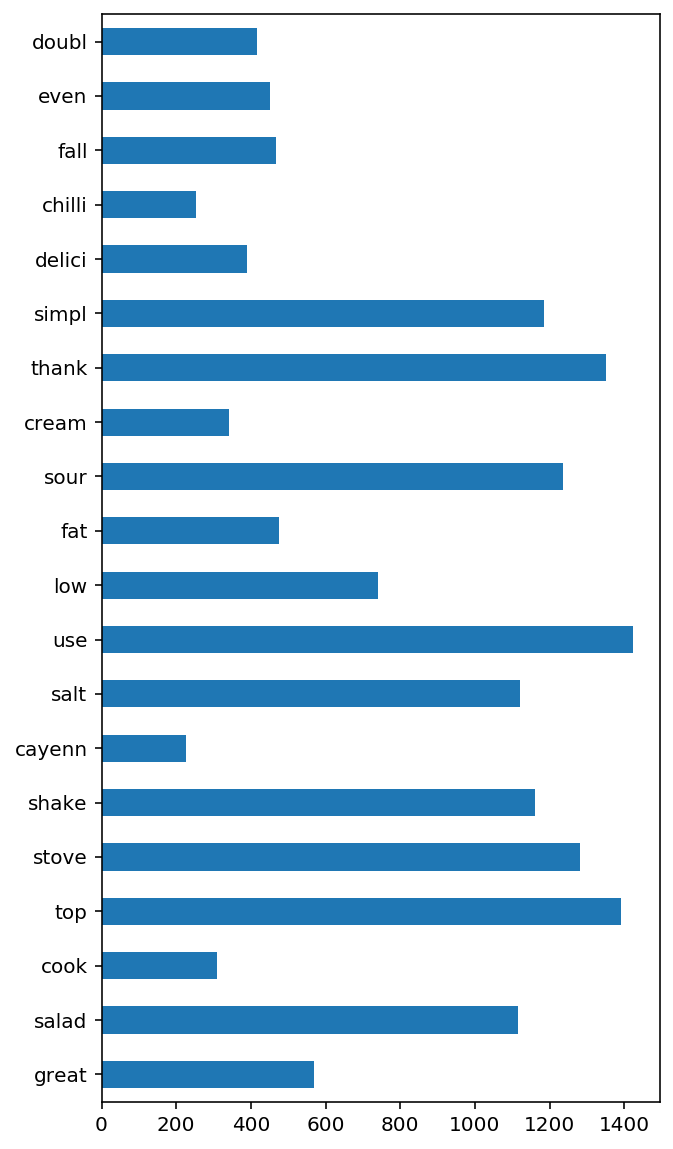

In [103]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))


In [39]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [40]:
data['review'] = data['review'].apply(stemming)
data.head(10)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,great salad cook top stove 15 minutesad shake ...
1,1293707,40893,2011-12-21,5,simpl delici great chilli fall even doubl brbr...
2,8937,44394,2002-12-01,4,work well easi use quit whole packag 10oz whit...
3,126440,85009,2010-02-27,5,made mexican top took bunko everyon love
4,57222,85009,2011-10-01,5,made cheddar bacon top ad sprinkl black pepper...
5,52282,120345,2005-05-21,4,sweet wait 2 day bought 2 pint raspberri ad mi...
6,124416,120345,2011-08-06,0,observ rate follow procedur strawberri instead...
7,2000192946,120345,2015-05-10,2,recip over sweet would start 13 14 cup sugar j...
8,76535,134728,2005-09-02,4,good
9,273745,134728,2005-12-22,5,better real


In [ ]:
'''
New try at NLP
'''

In [43]:
import re 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer 
  
# Initialize empty array 
# to append clean text  
corpus = []  
  
# 1000 (reviews) rows to clean 
for i in range(0, 1000):  
      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', data['review'][i])  
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(review)

In [47]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 
  
# To extract max 1500 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features = 1500)  
  
# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray()  
  
# y contains answers if review 
# is positive or negative 
y = data.iloc[:, 1].values 

In [59]:
dictionary = cv.vocabulary_.items()  

In [84]:
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
#vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

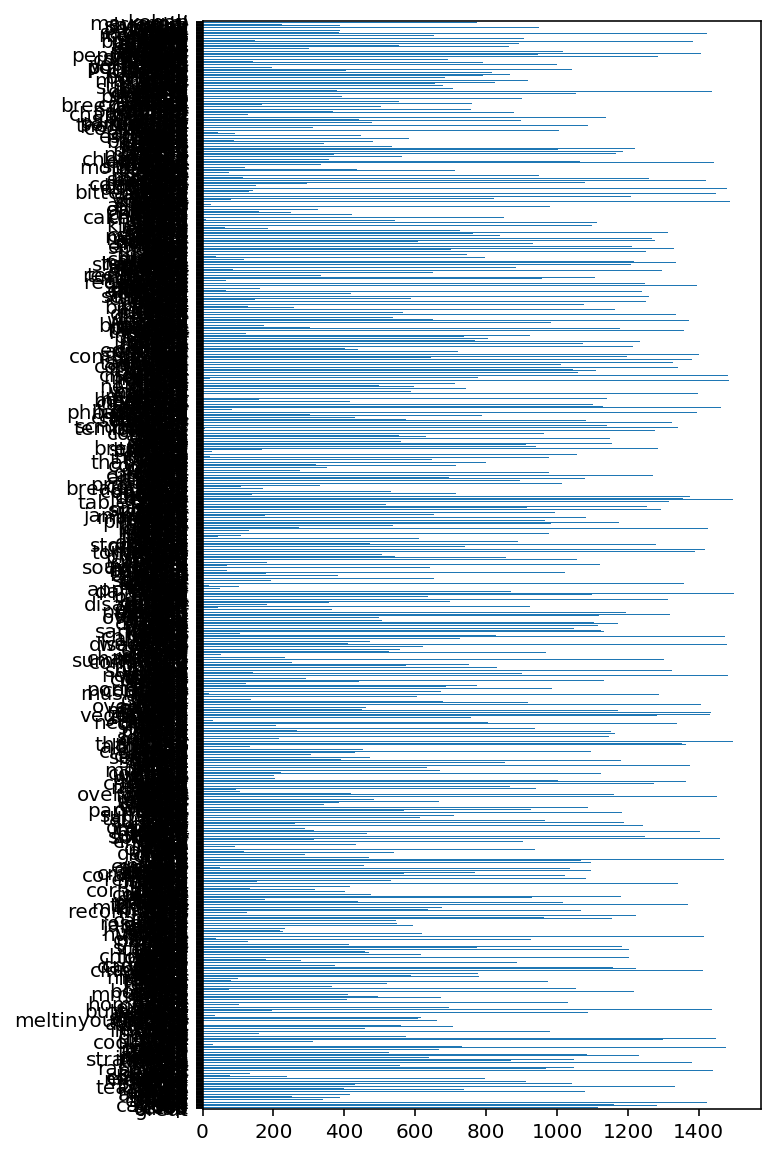

In [116]:
top_vacab = vocab_bef_stem
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [117]:
top_vacab.head()

great     570
salad    1116
cook      310
top      1391
stove    1281
dtype: int64

In [106]:
item_counts = top_vacab['0'].value_counts()
max_item = items_counts.max()

KeyError: '0'

In [118]:
stats = {top_vacab: count}

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [109]:
import operator


In [113]:
#max(stats.items(), key=operator.itemgetter(1))[0]
maximum = max(stats, key=stats.get)
print(maximum, stats[maximum])

vocab [570, 1116, 310, 1391, 1281, 1161, 226, 1121, 1423, 739, 475, 1235, 341, 1351, 1185, 389, 253, 468, 451, 416, 1377, 53, 513, 1079, 362, 1425, 737, 399, 863, 811, 1334, 1472, 1454, 429, 1042, 1462, 917, 913, 1461, 254, 750, 796, 1390, 455, 239, 78, 4, 1255, 133, 944, 1494, 1308, 1439, 376, 155, 969, 1047, 814, 626, 556, 6, 202, 489, 1382, 1319, 956, 871, 1048, 510, 1283, 640, 948, 1060, 1231, 1085, 63, 1280, 525, 285, 890, 1369, 666, 1166, 951, 1476, 731, 827, 1063, 30, 992, 661, 1401, 312, 1265, 363, 1298, 1447, 833, 77, 575, 198, 908, 730, 158, 947, 497, 981, 723, 463, 628, 459, 753, 1305, 707, 559, 119, 1057, 2, 73, 648, 848, 660, 787, 247, 608, 616, 1299, 1069, 36, 506, 1325, 1469, 1086, 874, 457, 196, 1438, 802, 523, 696, 465, 502, 713, 104, 1367, 609, 1032, 907, 1442, 1157, 408, 1128, 1264, 672, 495, 718, 1208, 409, 444, 818, 3, 1216, 156, 1303, 76, 1053, 396, 477, 366, 1285, 325, 1059, 520, 1076, 690, 974, 80, 779, 1385, 101, 521, 491, 780, 587, 240, 933, 776, 47, 1291, 121

In [114]:
stats

{'vocab': [570,
  1116,
  310,
  1391,
  1281,
  1161,
  226,
  1121,
  1423,
  739,
  475,
  1235,
  341,
  1351,
  1185,
  389,
  253,
  468,
  451,
  416,
  1377,
  53,
  513,
  1079,
  362,
  1425,
  737,
  399,
  863,
  811,
  1334,
  1472,
  1454,
  429,
  1042,
  1462,
  917,
  913,
  1461,
  254,
  750,
  796,
  1390,
  455,
  239,
  78,
  4,
  1255,
  133,
  944,
  1494,
  1308,
  1439,
  376,
  155,
  969,
  1047,
  814,
  626,
  556,
  6,
  202,
  489,
  1382,
  1319,
  956,
  871,
  1048,
  510,
  1283,
  640,
  948,
  1060,
  1231,
  1085,
  63,
  1280,
  525,
  285,
  890,
  1369,
  666,
  1166,
  951,
  1476,
  731,
  827,
  1063,
  30,
  992,
  661,
  1401,
  312,
  1265,
  363,
  1298,
  1447,
  833,
  77,
  575,
  198,
  908,
  730,
  158,
  947,
  497,
  981,
  723,
  463,
  628,
  459,
  753,
  1305,
  707,
  559,
  119,
  1057,
  2,
  73,
  648,
  848,
  660,
  787,
  247,
  608,
  616,
  1299,
  1069,
  36,
  506,
  1325,
  1469,
  1086,
  874,
  457,
  196,
  143

In [4]:
recipe_id = data.groupby('recipe_id')['recipe_id'].count()

In [5]:
(recipe_id.max()) & (data[data['rating'] == 5])

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

In [6]:
x = recipe_id.values.tolist()

In [16]:
(data[data['rating'] == 5]) & (data.loc[data[recipe_id] == '1613'])

KeyError: "None of [Int64Index([ 4,  1,  9,  2,  1,  3,  2,  2, 20,  2,\n            ...\n             1,  1,  1,  1,  1,  1,  1,  1,  1,  1],\n           dtype='int64', length=231637)] are in the [columns]"